# 자이로 센서 읽기 및 다루기

### 동규형 왔다갔다 도보 파일로 읽어봅시다.

In [24]:
import pandas as pd

# 데이터 불러오기
# X축은 좌우 / Y축은 앞뒤 / Z축은 동체 자체의 회전
df = pd.read_csv("./data/gyro/학원주변걷기_gyr.csv")


# df 전처리 time컬럼 및 첫번째 행 삭제
# df.drop(['time'], axis=1, inplace=True)
df.drop(0, axis=0, inplace=True)

display(df)

# str을 뉴머릭으로!
df['X_value'] = pd.to_numeric(df['X_value'])
df['Y_value'] = pd.to_numeric(df['Y_value'])
df['Z_value'] = pd.to_numeric(df['Z_value'])

df.info()

# 각 컬럼의 평균을 알아봅시다.
print("X축 평균 : ", df['X_value'].mean())
print("X축 표준편차 : ", df['X_value'].std())
print("Y축 평균 : ", df['Y_value'].mean())
print("Y축 표준편차 : ", df['Y_value'].std())
print("Z축 평균 : ", df['Z_value'].mean())
print("Z축 표준편차 : ", df['Z_value'].std())



# 전부 정규화시켜봅시다.
# 정규화 함수
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['X_value', 'Y_value', 'Z_value']
data = standard_scaling(df, scale_columns)

display(data)

,time,X_value,Y_value,Z_value
1,0.0000,0.00000,0.00000,0.00000
2,0.0016,25.31551,-55.12128,30.60200
3,0.0487,0.39796,-0.25550,-3.05252
4,0.1014,1.52534,0.15674,-5.70789
5,0.1526,2.85511,1.27998,-7.21030
...,...,...,...,...
11181,581.1326,158.28754,78.63102,36.37458
11182,581.1848,156.06323,78.60236,33.65569
11183,581.2410,153.65468,78.72060,31.40559
11184,581.2889,151.87289,79.23051,30.60081


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11185 entries, 1 to 11185
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     11185 non-null  object 
 1   X_value  11185 non-null  float64
 2   Y_value  11185 non-null  float64
 3   Z_value  11185 non-null  float64
dtypes: float64(3), object(1)
memory usage: 436.9+ KB
X축 평균 :  -14.06441677067501
X축 표준편차 :  33.97611978794694
Y축 평균 :  17.314758936075098
Y축 표준편차 :  22.79429532634784
Z축 평균 :  -109.86382844702727
Z축 표준편차 :  85.63936548508705


,time,X_value,Y_value,Z_value
1,0.0000,0.413950,-0.759609,1.282866
2,0.0016,1.159047,-3.177814,1.640202
3,0.0487,0.425663,-0.770818,1.247222
4,0.1014,0.458845,-0.752733,1.216216
5,0.1526,0.497983,-0.703456,1.198672
...,...,...,...,...
11181,581.1326,5.072738,2.689983,1.707607
11182,581.1848,5.007271,2.688725,1.675859
11183,581.2410,4.936382,2.693913,1.649585
11184,581.2889,4.883939,2.716283,1.640188


In [25]:
# 변화량을 만들어보자 -> X Y Z

variance_list = []

for i in range (len(data)):
    try :
        variance = data.iloc[i+1,1] - data.iloc[i,1]
        variance_list.append(abs(variance))
    except :
        variance_list.append(0)
        
data['X변화량'] = variance_list


variance_list2 = []
for i in range (len(data)):
    try :
        variance2 = data.iloc[i+1,2] - data.iloc[i,2]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
data['Y변화량'] = variance_list2


variance_list3 = []
for i in range (len(data)):
    try :
        variance3 = data.iloc[i+1,3] - data.iloc[i,3]
        variance_list3.append(abs(variance3))
    except :
        variance_list3.append(0)
        
data['Z변화량'] = variance_list3

# # 한번 군집분석용 데이터 파일을 만들어봅시다.
# clustering_data = data[['X변화량', 'Z변화량']]
# clustering_data.to_csv("./data/gyro/군집분석.csv")


display(data)

,X변화량,Z변화량
1,0.745097,0.357336
2,0.733384,0.392980
3,0.033182,0.031006
4,0.039138,0.017543
5,0.018575,0.017776
...,...,...
11181,0.065467,0.031748
11182,0.070889,0.026274
11183,0.052442,0.009397
11184,0.005603,0.000401


,time,X_value,Y_value,Z_value,X변화량,Y변화량,Z변화량
1,0.0000,0.413950,-0.759609,1.282866,0.745097,2.418205,0.357336
2,0.0016,1.159047,-3.177814,1.640202,0.733384,2.406996,0.392980
3,0.0487,0.425663,-0.770818,1.247222,0.033182,0.018085,0.031006
4,0.1014,0.458845,-0.752733,1.216216,0.039138,0.049277,0.017543
5,0.1526,0.497983,-0.703456,1.198672,0.018575,0.032931,0.017776
...,...,...,...,...,...,...,...
11181,581.1326,5.072738,2.689983,1.707607,0.065467,0.001257,0.031748
11182,581.1848,5.007271,2.688725,1.675859,0.070889,0.005187,0.026274
11183,581.2410,4.936382,2.693913,1.649585,0.052442,0.022370,0.009397
11184,581.2889,4.883939,2.716283,1.640188,0.005603,0.012769,0.000401


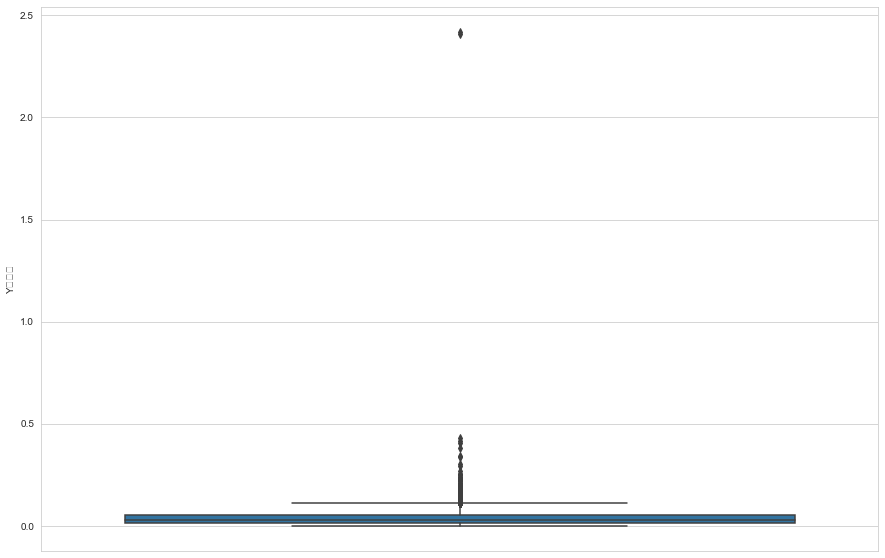

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))

sns.boxplot(y='Y변화량', data=data)
plt.show()

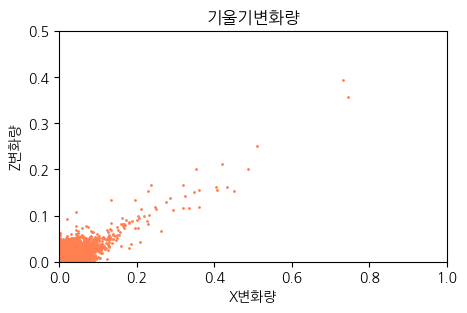

In [12]:
# 군집분석을 어떻게 할 것인가? -> 산점도부터 그려보자!!

# 먼저 AX변화량과 AY변화량을 찾아내 X값과 Y값으로 준다음 산점도를 그려보자
plt.style.use('default')

data.plot(kind='scatter', x='X변화량', y='Z변화량', c='coral', s=1, figsize=(5,3))
plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.title('기울기변화량')
plt.show()


# 한쪽에 몰려있긴 하지만, 양의 상관관계를 가진다는 것을 유추할 수 있음
# 즉 X축 변화량이 클 때, Z축 변화량도 커짐 (반대로 생각할 수도 있음) 

In [47]:
# 이상치 잡아내기 ==> 몇으로 설정할 것인가는 문제 0.3(18) or 0.4(10)


# X축 변화량 이상치 잡아내기
x = 0
y = 0
z = 0
for i in range (len(data)):
    if data.iloc[i,4] > 0.3:
        x += 1
    if data.iloc[i,5] > 0.3:
        y += 1

    
print("X축변화량 이상치 : ",x)
print("Y축변화량 이상치 : ",y)


X축변화량 이상치 :  18
Y축변화량 이상치 :  9


안전운전하세요.
alert


[[ 0.41396856 -0.75964327  1.28292333  7.18241811 52.61739713  4.35803125]
 [ 1.15909902 -3.17795642  1.64027497  7.06560309 52.36954702  4.8088831 ]
 [ 0.42568202 -0.77085271  1.24727785  0.08236566 -0.45360826  0.230363  ]
 [ 0.45886504 -0.75276668  1.21627004  0.14177413  0.2361038   0.06007283]
 [ 0.49800517 -0.70348723  1.19872581 -0.06331261 -0.12533054  0.0630135 ]]


array([[ 4.13968564e-01, -7.59643269e-01,  1.28292333e+00,
         7.18241811e+00,  5.26173971e+01,  4.35803125e+00],
       [ 1.15909902e+00, -3.17795642e+00,  1.64027497e+00,
         7.06560309e+00,  5.23695470e+01,  4.80888310e+00],
       [ 4.25682021e-01, -7.70852714e-01,  1.24727785e+00,
         8.23656628e-02, -4.53608258e-01,  2.30362998e-01],
       ...,
       [ 4.93660241e+00,  2.69403311e+00,  1.64965881e+00,
         2.74457624e-01, -3.58862580e-01, -4.29659003e-02],
       [ 4.88415764e+00,  2.71640418e+00,  1.64026108e+00,
        -1.92682104e-01, -5.71150326e-01, -1.56762968e-01],
       [ 4.88976065e+00,  2.72917417e+00,  1.64066173e+00,
        -2.48559346e-01, -8.53505446e-01, -1.61830495e-01]])

[1 1 0 ... 0 0 0]


<AxesSubplot:xlabel='X변화량', ylabel='Z변화량'>

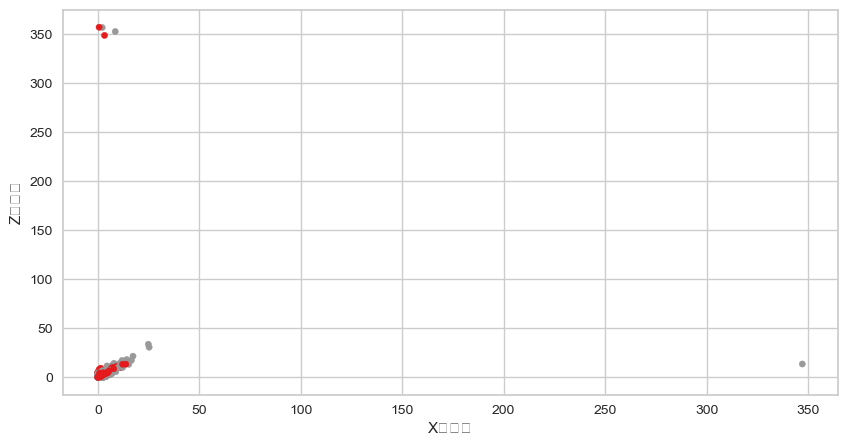

In [28]:
### 군집분석을 해보자 ### 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster

# 데이터 불러오기
df = pd.read_csv("./data/gyro/학원주변걷기_gyr.csv")

# df 전처리 time컬럼 및 첫번째 행 삭제
df.drop(['time'], axis=1, inplace=True)
df.drop(0, axis=0, inplace=True)


# str to numeric
df['X_value'] = pd.to_numeric(df['X_value'])
df['Y_value'] = pd.to_numeric(df['Y_value'])
df['Z_value'] = pd.to_numeric(df['Z_value'])


# 변화량 컬럼 만들기
variance_list = []

for i in range (len(df)):
    try :
        variance = df.iloc[i+1,0] - df.iloc[i,0]
        variance_list.append(abs(variance))
    except :
        variance_list.append(0)
        
df['X변화량'] = variance_list


variance_list2 = []
for i in range (len(df)):
    try :
        variance2 = df.iloc[i+1,1] - df.iloc[i,1]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
df['Y변화량'] = variance_list2


variance_list3 = []
for i in range (len(df)):
    try :
        variance3 = df.iloc[i+1,2] - df.iloc[i,2]
        variance_list3.append(abs(variance3))
    except :
        variance_list3.append(0)
        
df['Z변화량'] = variance_list3

# display(df)


# # 모형 준비
x = df.iloc[:, :]
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x[:5])

# display(x)

# # 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)

# # 모형 학습
kmeans.fit(x)

# # 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)

# # 예측결과를 데이터베이스에 입력
df['군집'] = cluster_label
# display(df.head(5))

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='X변화량', y='Z변화량', c='군집', cmap='Set1', colorbar=False, figsize=(10,5), legend=True)

# 뭔가 이상함
# 다시 X, Z 축의 데이터로만 다시 해보자

# 변화량 군집분석 적절한 군집 수를 파악해보자

KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

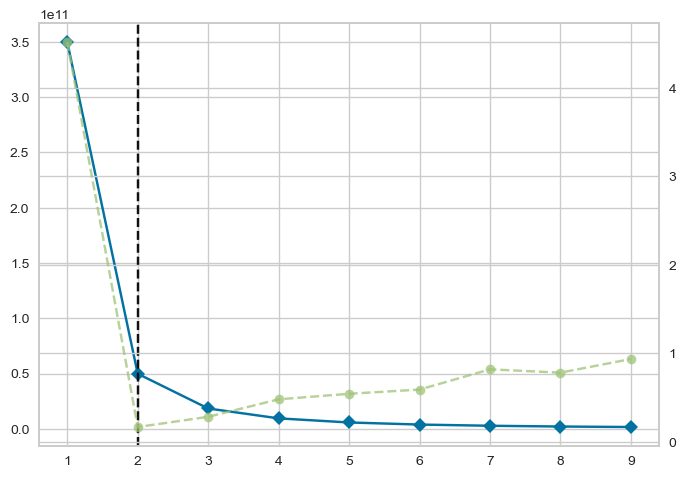

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

clustrering_df = pd.read_csv("./data/gyro/군집분석.csv")
cluster_df = clustrering_df.to_numpy()

from yellowbrick.cluster import KElbowVisualizer
 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(cluster_df.reshape(-1,1))

# 2개가 적절

[[-1.73189596  7.18241811  4.35803125]
 [-1.73158625  7.06560309  4.8088831 ]
 [-1.73127654  0.08236566  0.230363  ]
 [-1.73096683  0.14177413  0.06007283]
 [-1.73065712 -0.06331261  0.0630135 ]]
[0 0 0 ... 0 0 0]


<AxesSubplot:xlabel='X변화량', ylabel='Z변화량'>

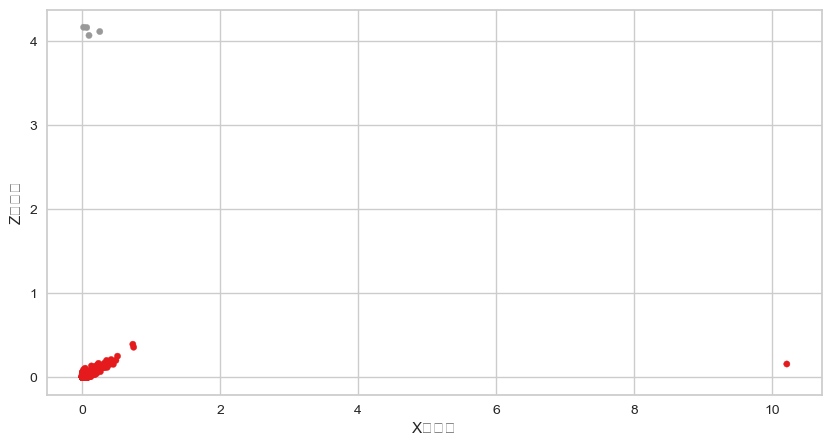

In [29]:
# # 모형 준비
x = clustrering_df.iloc[:, :]
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x[:5])

# display(x)

# # 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)

# # 모형 학습
kmeans.fit(x)

# # 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)

# # 예측결과를 데이터베이스에 입력
clustrering_df['군집'] = cluster_label
# display(df.head(5))

# 그래프로 표현 - 시각화
clustrering_df.plot(kind='scatter', x='X변화량', y='Z변화량', c='군집', cmap='Set1', colorbar=False, figsize=(10,5), legend=True)
